In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
train_ds="/content/drive/MyDrive/datasetskincancer/data/train"
test_ds="/content/drive/MyDrive/datasetskincancer/data/test"


# Data preprocessing
****

In [4]:
os.listdir('/content/drive/MyDrive/datasetskincancer/data/train')

['benign', 'malignant']

In [5]:
batch_size=32
img_size=224

In [6]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                             zoom_range=0.2,
                            width_shift_range=0.2,height_shift_range=0.2
                             )

test_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory(train_ds,
                                                target_size=(img_size, img_size),
                                                batch_size=batch_size,
                                                shuffle=True,
                                                class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_ds,
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    class_mode='categorical')

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


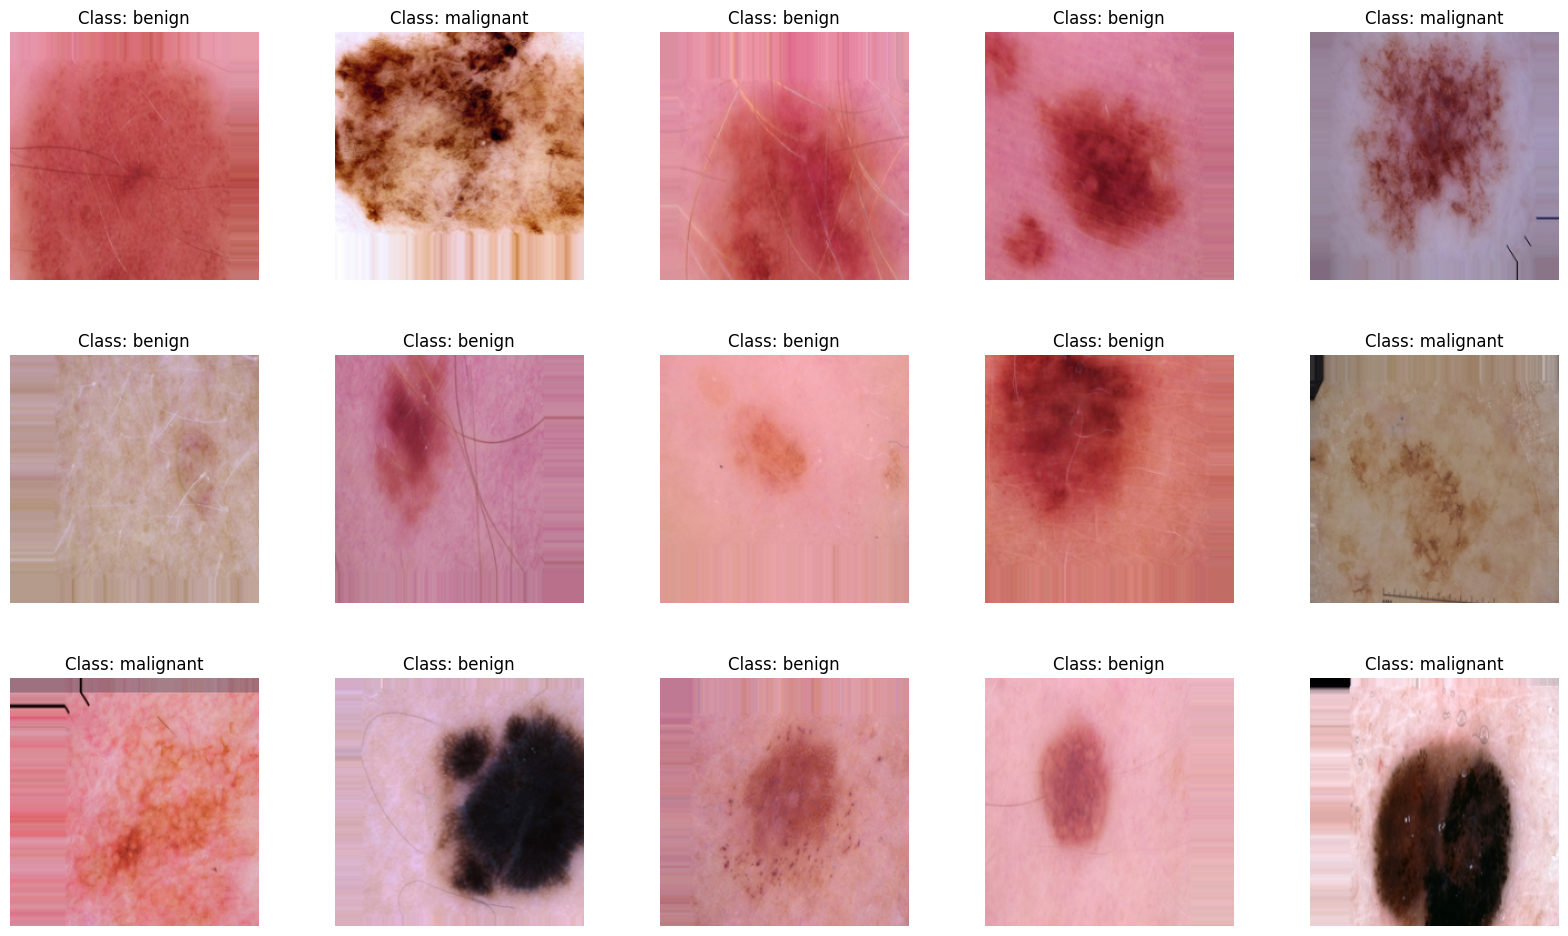

In [7]:
labels = [k for k in train_generator.class_indices]
sample_generate = train_generator.__next__()

images = sample_generate[0]
titles = sample_generate[1]
plt.figure(figsize = (20 , 20))

for i in range(15):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[np.argmax(titles[i],axis=0)]}')
    plt.axis("off")

In [8]:
print(len(train_generator))
print(len(test_ds))


83
50


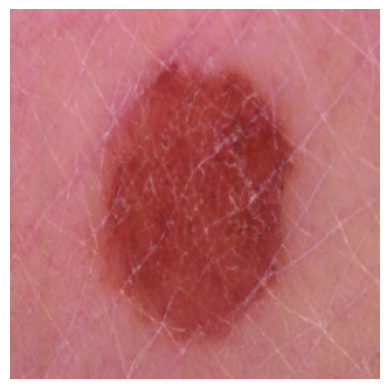

In [9]:
import matplotlib.pyplot as plt
from skimage import io

# Load image
img_url = "/content/drive/MyDrive/datasetskincancer/data/train/benign/1001.jpg"
img = io.imread(img_url)

# Display image
plt.imshow(img)
plt.axis('off')
plt.show()

In [10]:
from keras.layers import MaxPool2D

In [11]:
import numpy as np
from keras.layers import Dense,Flatten,Conv2D,Activation,Dropout

from keras import backend as K

import keras

from keras.models import Sequential, Model

from keras.models import load_model

from keras.optimizers import SGD

from keras.callbacks import EarlyStopping,ModelCheckpoint

from keras.layers import MaxPool2D

# Build VGG_19 Model

In [25]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.optimizers import Adam

# Load the pre-trained VGG16 model without the top layer (fully connected layers)
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional layers (optional)
for layer in base_model.layers:
    layer.trainable = False

# Create a Sequential model
model = Sequential([
    Input(shape=(224, 224, 3)),
    base_model,
    Flatten(),  # Flatten the output from the convolutional base
    Dense(4096, activation="relu"),
    Dropout(0.5),  # Add dropout to reduce overfitting
    Dense(4096, activation="relu"),
    Dropout(0.5),
    Dense(2, activation="sigmoid")  # Use 'sigmoid' for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss="binary_crossentropy", metrics=["accuracy"])



#   Model summary

In [26]:

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 2)                   │           8,194 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 134,268,738 (512.19 MB)

 Trainable params: 119,554,050 (456.06 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [27]:
history = model.fit(train_generator,
                    epochs=100,
                    validation_data=test_generator)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


83/83 ━━━━━━━━━━━━━━━━━━━━ 838s 9s/step - accuracy: 0.6471 - loss: 0.7267 - val_accuracy: 0.8364 - val_loss: 0.3764
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 49s 554ms/step - accuracy: 0.7784 - loss: 0.4704 - val_accuracy: 0.8288 - val_loss: 0.3659
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 49s 544ms/step - accuracy: 0.8231 - loss: 0.4029 - val_accuracy: 0.8348 - val_loss: 0.3833
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 81s 542ms/step - accuracy: 0.8059 - loss: 0.4096 - val_accuracy: 0.8242 - val_loss: 0.4056
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 49s 548ms/step - accuracy: 0.8057 - loss: 0.4108 - val_accuracy: 0.8394 - val_loss: 0.3344
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 48s 536ms/step - accuracy: 0.8198 - loss: 0.3955 - val_accuracy: 0.8424 - val_loss: 0.3435
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 82s 544ms/step - accuracy: 0.8349 - loss: 0.3549 - val_accuracy: 0.8409 - val_loss: 0.3334
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 48s 536ms/step - accuracy: 0.8258 - loss: 0.3697 - val_accuracy: 

In [28]:
n_categories = len(os.listdir('/content/drive/MyDrive/datasetskincancer/data/test'))# number of categories print(n_categories)

In [29]:
n_categories

2

In [30]:
results =pd.DataFrame(history.history)
results.head()

,accuracy,loss,val_accuracy,val_loss
0,0.713690,0.618991,0.836364,0.376359
1,0.793705,0.457928,0.828788,0.365884
2,0.810770,0.425538,0.834848,0.383324
3,0.816837,0.400391,0.824242,0.405568
4,0.817975,0.390227,0.839394,0.334395


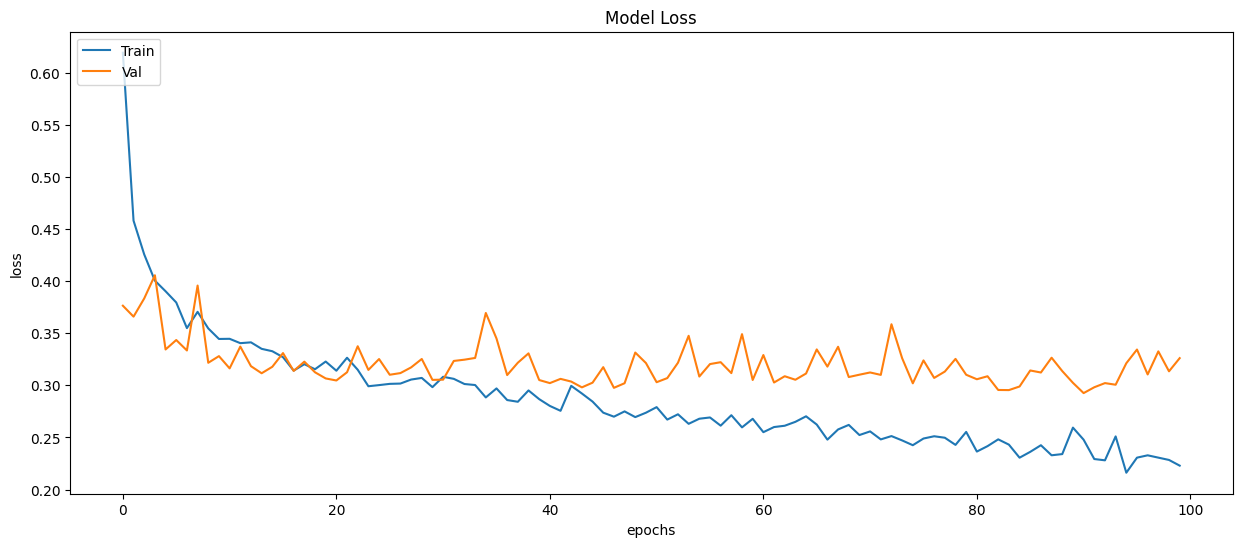

In [31]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

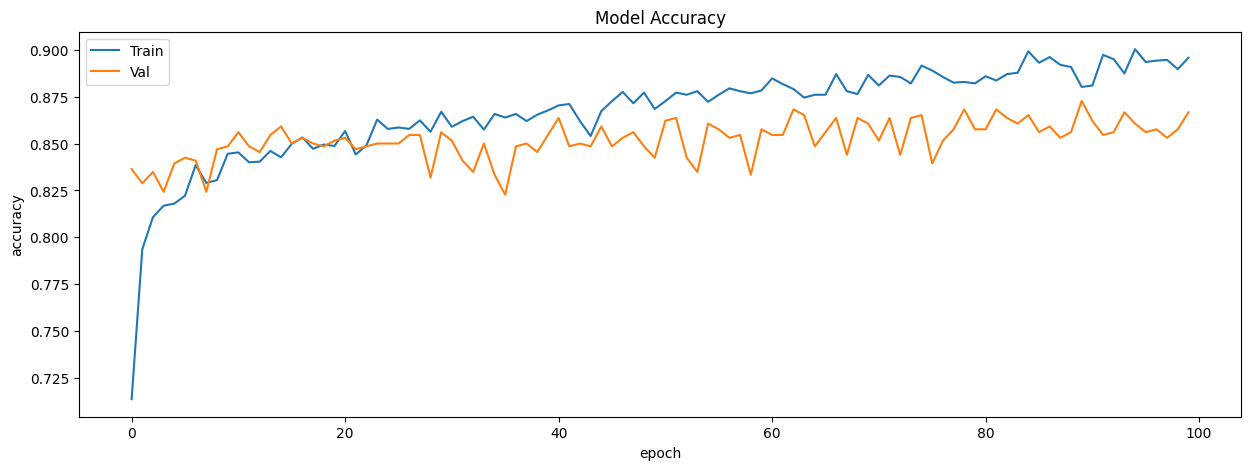

In [32]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [33]:
y_test_1 = test_generator.classes
y_pred_1 =model.predict(test_generator)
y_pred_1 = np.argmax(y_pred_1,axis=1)

21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 191ms/step


In [34]:
results =model.evaluate(test_generator)

21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 159ms/step - accuracy: 0.8344 - loss: 0.3902


In [35]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix,precision_score, recall_score, roc_curve, f1_score

print(classification_report(y_test_1, y_pred_1))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87       360
           1       0.82      0.90      0.86       300

    accuracy                           0.87       660
   macro avg       0.87      0.87      0.87       660
weighted avg       0.87      0.87      0.87       660



In [36]:
# Calculate metrics for each class
precision_0 = precision_score(y_test_1, y_pred_1, pos_label=0)
recall_0 = recall_score(y_test_1, y_pred_1, pos_label=0)
f1_0 = f1_score(y_test_1, y_pred_1, pos_label=0)
precision_1 = precision_score(y_test_1, y_pred_1, pos_label=1)
recall_1 = recall_score(y_test_1, y_pred_1, pos_label=1)
f1_1 = f1_score(y_test_1, y_pred_1, pos_label=1)

In [37]:
# Calculate additional metrics
auc = roc_auc_score(y_test_1, y_pred_1)
tn, fp, fn, tp = confusion_matrix(y_test_1, y_pred_1).ravel()
precision = precision_score(y_test_1, y_pred_1)
recall = recall_score(y_test_1, y_pred_1)
specificity = tn / (tn + fp)
fdr = fp / (fp + tp)
fnr = fn / (fn + tp)
fpr = fp / (fp + tn)



# Print additional metrics for each class
print("Additional Metrics for Class 0:")
print(f"Precision: {precision_0:.2f}")
print(f"Recall: {recall_0:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1 Score: {f1_0:.2f}")
print(f"FDR: {fdr:.2f}")
print(f"FNR: {fnr:.2f}")
print(f"FPR: {fpr:.2f}\n")

print("Additional Metrics for Class 1:")
print(f"Precision: {precision_1:.2f}")
print(f"Recall: {recall_1:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1 Score: {f1_1:.2f}")
print(f"FDR: {fdr:.2f}")
print(f"FNR: {fnr:.2f}")
print(f"FPR: {fpr:.2f}\n")

# Print average metrics
precision_avg = (precision_0 + precision_1) / 2
recall_avg = (recall_0 + recall_1) / 2
f1_avg = (f1_0 + f1_1) / 2

print("Average Metrics:")
print(f"Precision: {precision_avg:.2f}")
print(f"Recall: {recall_avg:.2f}")
print(f"F1 Score: {f1_avg:.2f}")
print(f"AUC: {auc:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"FDR: {fdr:.2f}")
print(f"FNR: {fnr:.2f}")
print(f"FPR: {fpr:.2f}")




Additional Metrics for Class 0:
Precision: 0.91
Recall: 0.84
Specificity: 0.84
F1 Score: 0.87
FDR: 0.18
FNR: 0.10
FPR: 0.16

Additional Metrics for Class 1:
Precision: 0.82
Recall: 0.90
Specificity: 0.84
F1 Score: 0.86
FDR: 0.18
FNR: 0.10
FPR: 0.16

Average Metrics:
Precision: 0.87
Recall: 0.87
F1 Score: 0.87
AUC: 0.87
Specificity: 0.84
FDR: 0.18
FNR: 0.10
FPR: 0.16


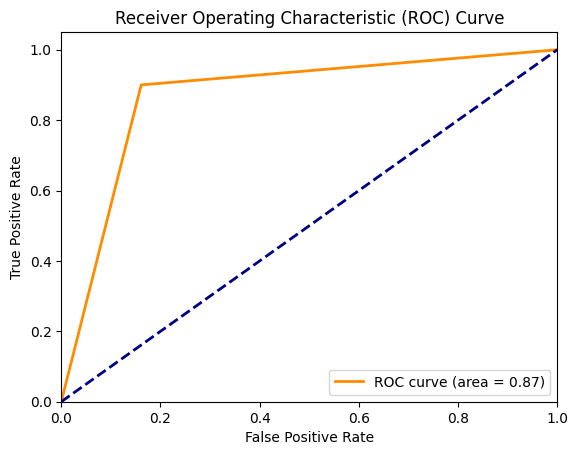

In [38]:
import matplotlib.pyplot as plt
# Calculate ROC curve
fpr_values, tpr_values, _ = roc_curve(y_test_1, y_pred_1)

# Plot ROC curve
plt.figure()
plt.plot(fpr_values, tpr_values, color='darkorange', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 591ms/step


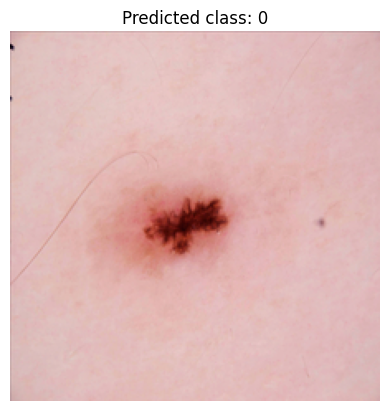

In [39]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

image_directory = '/content/drive/MyDrive/datasetskincancer/data/test/benign'
img_size = 224

images = []
for filename in os.listdir(image_directory):
    path = os.path.join(image_directory, filename)
    img = Image.open(path)
    img = img.resize((img_size, img_size))
    images.append(img)

images = np.array([np.array(img) for img in images])
images = images / 255.0

predictions = model.predict(images)

# Select image to display
img_index = 0

# Get predicted class label
class_label = np.argmax(predictions[img_index])

# Display image and predicted class label
plt.imshow(images[img_index])
plt.axis('off')
plt.title('Predicted class: ' + str(class_label))
plt.show()

In [40]:
for i in range(len(images)):
    predicted_class = np.argmax(predictions[i])
    class_probability = predictions[i, predicted_class]
    print(f'Predicted class for {i+1}.jpg : {labels[predicted_class]}')
    print('Class probability:', class_probability)

Predicted class for 1.jpg : tensor([0.])
Class probability: 0.73549724
Predicted class for 2.jpg : tensor([0.])
Class probability: 0.99876153
Predicted class for 3.jpg : tensor([0.])
Class probability: 1.0
Predicted class for 4.jpg : tensor([0.])
Class probability: 0.6739936
Predicted class for 5.jpg : tensor([0.])
Class probability: 0.9802854
Predicted class for 6.jpg : tensor([0.])
Class probability: 0.9940526
Predicted class for 7.jpg : tensor([1.])
Class probability: 0.8144022
Predicted class for 8.jpg : tensor([0.])
Class probability: 0.9994875
Predicted class for 9.jpg : tensor([0.])
Class probability: 0.5467101
Predicted class for 10.jpg : tensor([0.])
Class probability: 0.752257
Predicted class for 11.jpg : tensor([1.])
Class probability: 0.79980236
Predicted class for 12.jpg : tensor([0.])
Class probability: 0.999554
Predicted class for 13.jpg : tensor([0.])
Class probability: 0.94719905
Predicted class for 14.jpg : tensor([0.])
Class probability: 0.9983784
Predicted class for